<a href="https://colab.research.google.com/github/marco-milanesi/dynamic-weighing/blob/main/CORR_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pesatura Dinamica

In [ ]:
!wget https://raw.githubusercontent.com/EdoGitMira/Gruppo_H_pesatura_dinamica/main/dataset/velocit%C3%A0%20separate%20numeri%20cartelle%20e%20frequenza/dataset_interval_30_num_v1v4_f.csv

--2022-02-15 19:51:04--  https://raw.githubusercontent.com/EdoGitMira/Gruppo_H_pesatura_dinamica/main/dataset/velocit%C3%A0%20separate%20numeri%20cartelle%20e%20frequenza/dataset_interval_30_num_v1v4_f.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 616087 (602K) [text/plain]
Saving to: ‘dataset_interval_30_num_v1v4_f.csv.1’

dataset_interval_30 100%[===================>] 601.65K  --.-KB/s    in 0.007s  

2022-02-15 19:51:04 (80.6 MB/s) - ‘dataset_interval_30_num_v1v4_f.csv.1’ saved [616087/616087]



# Linear Regression

## Import packages


In [ ]:
import pandas as pd
import sklearn
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

## Loading Data

In [ ]:
data = pd.read_csv('dataset_interval_30_num_v1v4_f.csv',sep=';')
print("Loaded: ",len(data))
y = data.values[:,2]
x = data.values[:,3:]
data

Loaded:  1171


,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
0,0,0,0.940722,80,0.934951,0.947281,0.936817,0.932422,0.954280,0.927340,0.951903,0.940075,0.927342,0.949495,0.942487,0.938125,0.937906,0.943300,0.937605,0.939984,0.949625,0.929557,0.941465,0.944454,0.932541,0.952658,0.938290,0.932600,0.940095,0.939908,0.952020,0.933572,0.938390,0.937746,64.516129
1,1,0,0.940724,80,0.938596,0.942626,0.943911,0.943105,0.935278,0.935451,0.945233,0.943818,0.937045,0.940146,0.942884,0.936940,0.944368,0.936872,0.937180,0.951417,0.933969,0.931622,0.949438,0.939222,0.942081,0.943459,0.923086,0.949457,0.950090,0.930559,0.940304,0.933787,0.951602,0.946262,67.204301
2,2,0,0.940726,80,0.940269,0.942997,0.953196,0.924297,0.939642,0.944299,0.937261,0.950583,0.932082,0.938554,0.940867,0.939336,0.951431,0.931277,0.931509,0.948825,0.938511,0.946775,0.939753,0.932211,0.936624,0.950314,0.940698,0.935162,0.946349,0.931447,0.943334,0.950664,0.928925,0.944014,64.516129
3,3,0,0.940727,80,0.938743,0.930717,0.954186,0.942035,0.927624,0.954751,0.930242,0.945948,0.937048,0.935810,0.957821,0.925649,0.931443,0.956546,0.935066,0.943690,0.931537,0.943100,0.946100,0.938140,0.936352,0.947721,0.935794,0.934707,0.944975,0.943624,0.943394,0.930804,0.932044,0.957321,70.126227
4,4,0,0.940729,80,0.943738,0.935670,0.942372,0.935055,0.943922,0.945025,0.935949,0.938375,0.940968,0.934284,0.957309,0.931287,0.935642,0.943470,0.934745,0.951892,0.938486,0.934905,0.939017,0.940318,0.949918,0.937227,0.935852,0.938706,0.932690,0.956961,0.939349,0.935572,0.936658,0.937070,64.516129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166,1166,39,1.229075,45,1.217727,1.235705,1.226294,1.218774,1.225785,1.241371,1.229099,1.222145,1.229575,1.230317,1.230659,1.229026,1.231028,1.225655,1.225566,1.231901,1.225413,1.227375,1.231228,1.227000,1.228045,1.228111,1.227106,1.230068,1.231776,1.227336,1.227609,1.225994,1.229263,1.228275,161.290323
1167,1167,39,1.229070,45,1.218316,1.215099,1.229399,1.242434,1.226785,1.214957,1.228456,1.247464,1.221519,1.211177,1.229318,1.241302,1.226757,1.221543,1.230687,1.224745,1.232681,1.227166,1.228128,1.234416,1.227077,1.226244,1.229899,1.231391,1.226588,1.224919,1.229247,1.231570,1.230654,1.226415,161.290323
1168,1168,39,1.229066,45,1.229784,1.238363,1.219251,1.220227,1.237564,1.231634,1.216369,1.225508,1.226653,1.234252,1.219950,1.231496,1.232726,1.223196,1.228346,1.230721,1.228440,1.227460,1.231507,1.226421,1.227097,1.232536,1.226271,1.230036,1.225462,1.229923,1.228635,1.225653,1.231556,1.228514,124.069479
1169,1169,39,1.229061,45,1.222123,1.219087,1.232538,1.236437,1.221407,1.226296,1.227515,1.224354,1.234428,1.227694,1.226861,1.233709,1.224843,1.224282,1.225720,1.229173,1.231316,1.227182,1.227463,1.227934,1.228823,1.226408,1.229304,1.227939,1.228957,1.229100,1.227032,1.227019,1.228386,1.227531,134.408602


# PCA

Total Variance in our dataset is:  2928.602523133187
The 95% variance we want to have is:  2782.1723969765276

Variance explain with 2 components:  2928.354499058427
Variance explain with 5 components:  2928.595865117849
Variance explain with 10 components:  2928.5987990205927
Variance explain with 12 components:  2928.5995360356865
Variance explain with 18 components:  2928.601154343627
Variance explain with 20 components:  2928.6015189988616


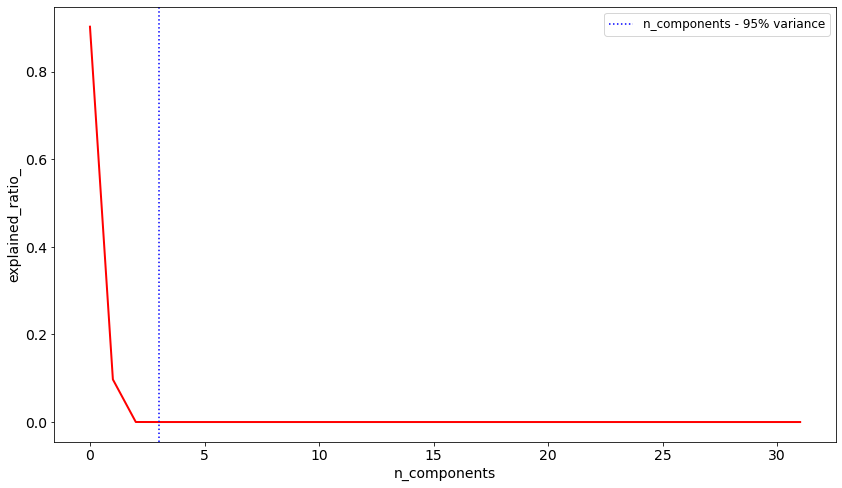

In [ ]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

n_components = x.shape[1]

pca = PCA(n_components=n_components, random_state=453)
x_r = pca.fit(x).transform(x)

total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ",total_variance)
var_95 = total_variance*0.95
print("The 95% variance we want to have is: ", var_95)
print("")

a = zip(range(0,n_components),pca.explained_variance_)
a = pd.DataFrame(a,columns=["PCA Comp", "Explained Variance"])

# Trying to hit 95 %
print("Variance explain with 2 components: ", sum(a["Explained Variance"][0:2]))
print("Variance explain with 5 components: ", sum(a["Explained Variance"][0:5]))
print("Variance explain with 10 components: ", sum(a["Explained Variance"][0:10]))
print("Variance explain with 12 components: ", sum(a["Explained Variance"][0:12]))
print("Variance explain with 18 components: ", sum(a["Explained Variance"][0:18]))
print("Variance explain with 20 components: ", sum(a["Explained Variance"][0:20]))



# Plotting the data
plt.figure(1, figsize=(14,8))
plt.plot(pca.explained_variance_ratio_,linewidth=2, c='r')
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

# Plotting line with 95 %
plt.axvline(3,linestyle=':', label='n_components - 95% variance',c = 'blue')
plt.legend(prop=dict(size=12))
plt.show()            
            
            

## Running PCA again

In [ ]:
pca_new = PCA(n_components=5, random_state=453)
x_r = pca_new.fit(x).transform(x)


## Scree plot

In [ ]:
explained_variance = pca_new.explained_variance_ratio_

import numpy as np
import plotly.express as px

explained_variance = np.insert(explained_variance, 0, 0)
cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))
pc_df = pd.DataFrame(['','PC1', 'PC2', 'PC3','PC4', 'PC5'], columns=['PC'])
explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])
cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])

df_explained_variance = pd.concat([pc_df, explained_variance_df, cumulative_variance_df], axis=1)
df_explained_variance

,PC,Explained Variance,Cumulative Variance
0,,0.000000e+00,0.000
1,PC1,9.026569e-01,0.903
2,PC2,9.725844e-02,1.000
3,PC3,8.165833e-05,1.000
4,PC4,4.156820e-07,1.000
5,PC5,3.427803e-07,1.000


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=df_explained_variance['PC'],
        y=df_explained_variance['Cumulative Variance'],
        marker=dict(size=15, color="LightSeaGreen")
    ))

fig.add_trace(
    go.Bar(
        x=df_explained_variance['PC'],
        y=df_explained_variance['Explained Variance'],
        marker=dict(color="RoyalBlue")
    ))

fig.show()

### Save the figure

In [ ]:
%%capture
!pip install kaleido
!pip install plotly>=4.0.0
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

import os

if not os.path.exists("images"):
    os.mkdir("images")

fig.write_image("images/fig1.svg")





# Train test e split manuale

### Senza PCA

In [ ]:
data_train=data.loc[(data['0']%2==0) | (data['0']%3==0)]
data_test=data.loc[(data['0']%2==1) & (data['0']%3==1)]
y_train = data_train.values[:,2]
y_test = data_test.values[:,2]
x_train = data_train.values[:,3:]
x_test = data_test.values[:,3:]

## Con PCA

In [ ]:
x_train=[]
for el in data_train['Unnamed: 0']:
  x_train.append(x_r[el,:].tolist())
x_test=[]
for el in data_test['Unnamed: 0']:
  x_test.append(x_r[el,:].tolist())
  
data_train=data.loc[(data['0']%2==0) | (data['0']%3==0)]
data_test=data.loc[(data['0']%2==1) & (data['0']%3==1)]
y_train = data_train.values[:,2]
y_test = data_test.values[:,2]
x_train = data_train.values[:,4:4+10].tolist()
x_test = data_test.values[:,4:4+10].tolist()
f_train=data_train.values[:,3+21].tolist()
f_test=data_test.values[:,3+21].tolist()
#x_train=np.append(x_train,data_train.values[:,3+21].tolist(),axis=1)
for i in range(len(x_train)):
  x_train[i].append(f_train[i])
for i in range(len(x_test)):
  x_test[i].append(f_test[i])
#x_train['f']=data_train.values[:,3+21].tolist()

# Train test and split automatico

In [ ]:
from collections import Counter
print("Labels distribution:",Counter(y))

# train-test split

# In case of PCA is used change x to x_r
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, random_state=10,train_size=0.5)
print("Train labels distribution:", Counter(y_train))
print("Test labels distribution:",Counter(y_test))


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(585, 22)
(586, 22)
(585,)
(586,)


## Train the model

In [ ]:
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

## Predict test results

In [ ]:
y_pred = ml.predict(x_test)

y = β0 + β1 · x1 +  β2 · x2 + ... + βn · xn

## Change units to have the weight in grams

In [ ]:
m = 5191420.51
std_m = 639.702
q = -4874.38
std_q = 0.3818

std_tot = 0.3818
MSE_statica = 0.1458

y_pred_g = m*(y_pred/1000) + q
y_test_g = m*(y_test/1000) + q


## Evaluate the model

In [ ]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test,y_pred)

from sklearn.metrics import mean_squared_error
import math

MSE_regressor = (mean_squared_error(y_test_g, y_pred_g)*y_test_g.shape[0])/(y_test_g.shape[0] -2)
RMSE_regressor = math.sqrt(MSE_regressor)

RMSE_tot = math.sqrt(MSE_regressor + MSE_statica)
print("RMSE Regressore: " + str(round(RMSE_regressor,4)) + "\t \t" + "RMSE totale: " + str(round(RMSE_tot,4)) + "\t \t" + "R^2 :" + str(r2_score))

RMSE Regressore: 3.6499	 	RMSE totale: 3.6699	 	R^2 :0.9999436664677442


## Plot the results

### Reproduce scikit-learn results with linear algebra

In [ ]:
N = len(x_test)
p = len(x_test[0]) + 1


In [ ]:
X_with_intercept = np.empty(shape=(N, p), dtype=np.float)
X_with_intercept[:, 0] = 1
X_with_intercept[:, 1:p] = x_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [ ]:
beta_hat = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ y_test


In [ ]:
import statsmodels.api as sm
ols = sm.OLS(y_test, X_with_intercept)
ols_result = ols.fit()

std = ols_result.bse
coefficient = print(ols_result.params)
norm=0
for el in std:
  norm+=math.pow(el,2)
print(math.sqrt(norm))
print(std)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



[-2.80630249e-04 -3.95381765e-06  3.30858888e-03  1.01706311e-03
  1.87908757e-03  7.62561904e-03  1.56969720e-02  2.25433813e-02
  2.96626781e-02  3.86560268e-02  4.73497389e-02  6.27089255e-02
  7.30193735e-02  7.60110858e-02  8.93333303e-02  9.41947243e-02
  9.21521109e-02  8.69274861e-02  7.75149291e-02  6.28409899e-02
  4.96778497e-02  4.00302120e-02  2.87692899e-02]
0.011199597748534237
[3.35763851e-04 1.59744703e-06 1.25003268e-03 1.90380765e-03
 2.20714268e-03 2.19465706e-03 2.14464296e-03 2.31350169e-03
 2.36875947e-03 2.49729977e-03 2.31501245e-03 2.25757467e-03
 2.32120225e-03 2.19411824e-03 2.28818080e-03 2.46915899e-03
 2.76574500e-03 2.72416377e-03 2.84323941e-03 2.90711560e-03
 2.88776969e-03 2.99433283e-03 2.78250045e-03]


In [ ]:
print(ols_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.411e+05
Date:                Tue, 15 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:51:18   Log-Likelihood:                 3475.2
No. Observations:                 586   AIC:                            -6904.
Df Residuals:                     563   BIC:                            -6804.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.000     -0.836      0.4

In [ ]:
plt.scatter(y_test,y_pred)
plt.rcParams.update({'font.size': 14})
plt.xlim(0.92,1.25)
plt.ylim(0.92,1.25)
plt.xlabel('Peso predetto [mV/V]')
plt.ylabel('Peso reale [mV/V]')

# Save the figure
plt.savefig("reale-predetto.pdf")

NameError: ignored